# 3.7 Exercises <a name="exercises"></a>

The following notebook contains exercises 9, 10, 13 for the 'Linear Regression' chapter of ISLR book.

## Question 9
This question involves the use of multiple linear regression on the `Auto` data set.

In [2]:
library(MASS)
library(ISLR)

# load the Auto dataset
attach(Auto)

In [3]:
# let's explore more our dataset
?Auto

Auto {ISLR},R Documentation


In [23]:
# check dataframe
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


Let's look at the dataset distributions as well. This will give us a better feel for the features.

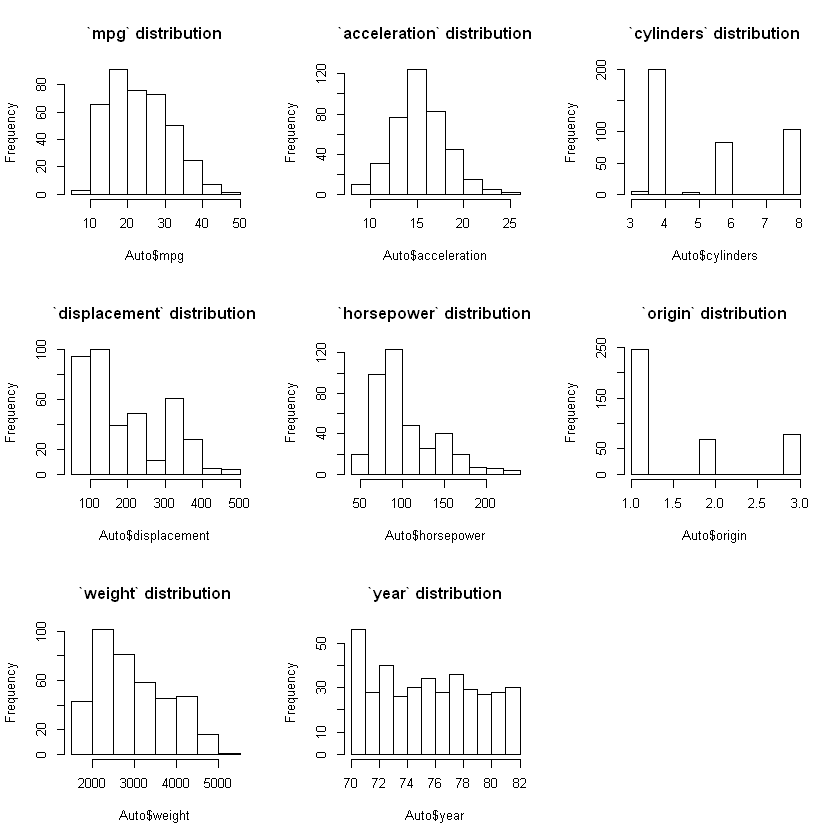

In [47]:
par(mfrow=c(3,3))
hist(Auto$mpg, main="`mpg` distribution")
hist(Auto$acceleration, main="`acceleration` distribution")
hist(Auto$cylinders, main="`cylinders` distribution")
hist(Auto$displacement, main="`displacement` distribution")
hist(Auto$horsepower, main="`horsepower` distribution")
hist(Auto$origin, main="`origin` distribution")
hist(Auto$weight, main="`weight` distribution")
hist(Auto$year, main="`year` distribution")

### Step (a)

> Produce a scatterplot matrix which includes all of the variables in the data set.

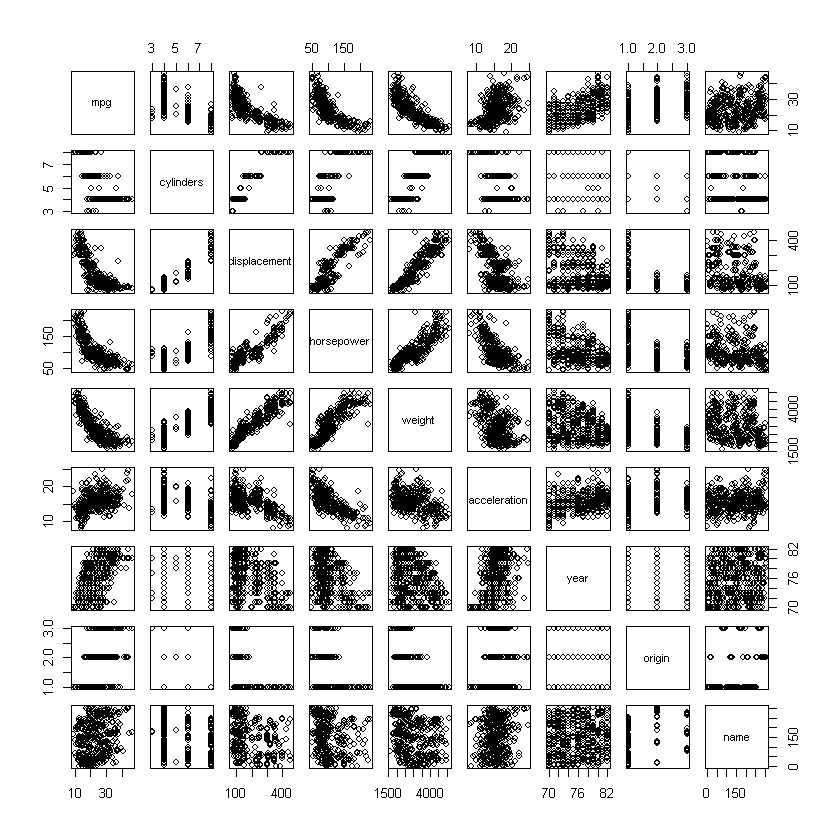

In [5]:
plot(Auto)

### Step (b)

> Compute the matrix of correlations between the variables using the function `cor()`. You will need to exclude the name variable, `cor()` which is qualitative.

In [6]:
cor(Auto[, names(Auto) != 'name'])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


### Step (c)

> Use the `lm()` function to perform a multiple linear regression with `mpg` as the response and all other variables except name as the predictors. Use the `summary()` function to print the results. Comment on the output. For instance: 

In [7]:
lm.fit = lm(mpg~.-name, data=Auto)
summary(lm.fit)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


#### Step (c) (i)

> Is there a relationship between the predictors and the response?

This question can be answered by testing the hypothesis that $H_0 : \beta_{cylinders} = \beta_{displacement} = ... = \beta_{origin}$.

The above F-statistic helps us to determine whether or not we should reject the $H_0$ or not. In our case the p-value of F-statistic is very low, which means that there is a relationship between the predictors and response.

_________

#### Step (c) (ii)

> Which predictors appear to have a statistically significant relationship to the response?

To answer this question we simply look at p-values of each of the predictors. We can observe that with significance level of 5% all of the predictors have statisticall significant relationship except:
* cylinders
* horsepower
* acceleration

_____

#### Step (c) (iii)

> What does the coefficient for the year variable suggest?

The statistical significance of the year predictor in our linear model indicates that there is a positive relationship between the year of the model of the car and its mileage.

---

### Step (d)

> Use the `plot()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

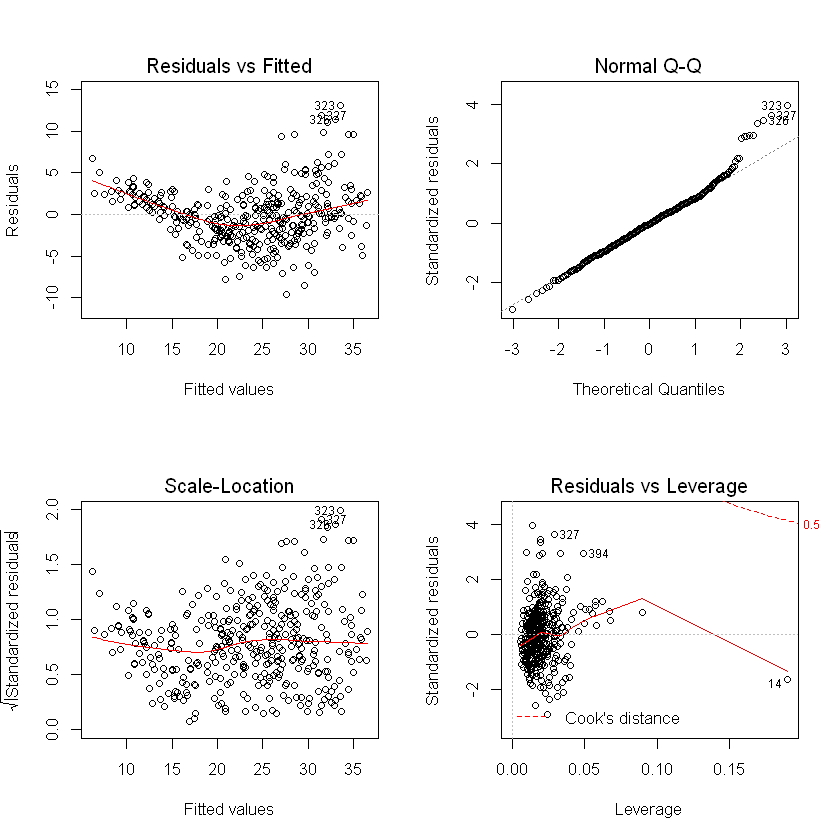

In [8]:
par(mfrow=c(2,2))
plot(lm.fit)

On the basis of residual plots we can observe some non-linearity. Question, __would need more explanation__

The leverage plot does show us that there are values with unusually high values.

### Step (e)

> Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?

In [9]:
lm.fit_inter = lm(mpg~.-name+displacement:weight, data=Auto)
summary(lm.fit_inter)


Call:
lm(formula = mpg ~ . - name + displacement:weight, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9027 -1.8092 -0.0946  1.5549 12.1687 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -5.389e+00  4.301e+00  -1.253   0.2109    
cylinders            1.175e-01  2.943e-01   0.399   0.6899    
displacement        -6.837e-02  1.104e-02  -6.193 1.52e-09 ***
horsepower          -3.280e-02  1.238e-02  -2.649   0.0084 ** 
weight              -1.064e-02  7.136e-04 -14.915  < 2e-16 ***
acceleration         6.724e-02  8.805e-02   0.764   0.4455    
year                 7.852e-01  4.553e-02  17.246  < 2e-16 ***
origin               5.610e-01  2.622e-01   2.139   0.0331 *  
displacement:weight  2.269e-05  2.257e-06  10.054  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.964 on 383 degrees of freedom
Multiple R-squared:  0.8588,	Adjusted R-squared:  0.8558 
F-stati

In [10]:
lm.fit_inter = lm(mpg ~ .-name + displacement:weight + displacement:cylinders, data=Auto)
summary(lm.fit_inter)


Call:
lm(formula = mpg ~ . - name + displacement:weight + displacement:cylinders, 
    data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0609  -1.7589  -0.0494   1.5790  12.1496 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -4.795e+00  4.515e+00  -1.062  0.28883    
cylinders              -1.091e-01  5.965e-01  -0.183  0.85502    
displacement           -7.186e-02  1.363e-02  -5.273 2.25e-07 ***
horsepower             -3.457e-02  1.304e-02  -2.651  0.00836 ** 
weight                 -1.030e-02  1.064e-03  -9.680  < 2e-16 ***
acceleration            6.618e-02  8.817e-02   0.751  0.45334    
year                    7.840e-01  4.566e-02  17.171  < 2e-16 ***
origin                  5.475e-01  2.643e-01   2.071  0.03901 *  
displacement:weight     2.141e-05  3.712e-06   5.768 1.66e-08 ***
cylinders:displacement  1.186e-03  2.715e-03   0.437  0.66251    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '

In [11]:
lm.fit_inter = lm(mpg ~ .-name + displacement:weight + displacement:cylinders + year:horsepower, data=Auto)
summary(lm.fit_inter)


Call:
lm(formula = mpg ~ . - name + displacement:weight + displacement:cylinders + 
    year:horsepower, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0899 -1.4545 -0.1088  1.3885 11.2116 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -6.904e+01  1.002e+01  -6.892 2.28e-11 ***
cylinders               4.861e-01  5.678e-01   0.856   0.3924    
displacement           -6.408e-02  1.287e-02  -4.977 9.79e-07 ***
horsepower              6.040e-01  9.099e-02   6.638 1.10e-10 ***
weight                 -9.063e-03  1.016e-03  -8.916  < 2e-16 ***
acceleration           -1.457e-02  8.377e-02  -0.174   0.8621    
year                    1.609e+00  1.242e-01  12.957  < 2e-16 ***
origin                  5.200e-01  2.488e-01   2.090   0.0373 *  
displacement:weight     1.898e-05  3.511e-06   5.407 1.14e-07 ***
cylinders:displacement -1.632e-04  2.562e-03  -0.064   0.9492    
horsepower:year        -8.765e-03  1.238e-03  

### Step (f)

> Try a few different transformations of the variables, such as $log(X)$, $\sqrt(X)$, $X^2$ . Comment on your findings.

In [12]:
#tbd

## Question 10

This question should be answered using the `Carseats` data set.

* (a) Fit a multiple regression model to predict Sales using Price, Urban , and US .
* (b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!
* (c) Write out the model in equation form, being careful to handle the qualitative variables properly.
* (d) For which of the predictors can you reject the null hypothesis $H_0: \beta_j = 0$?
* (e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.
* (f) How well do the models in (a) and (e) fit the data?
* (g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).
* (h) Is there evidence of outliers or high leverage observations in the model from (e)?

In [13]:
attach(Carseats)

In [14]:
?Carseats

Carseats {ISLR},R Documentation


**(a) Solution**

In [15]:
lm.csfit = lm(Sales~Price+Urban+US, data=Carseats)
summary(lm.csfit)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


**(b) Solution**

The model has two qualitative variables - `Urban` indicating whether the store is in urban area or not and `US` indicating whether the store is located in US or not. The multiregression model shows that price has a significant impact on sales as well as the location of the store in US. Location of the store in urban area vs villages doesn't seem to have significant impact.

**(c) Solution**

The model in the equation form is as following

$ sales = \beta_0 + \beta_1 * Price + \beta_2 * UrbanYes + \beta_3 * USYes $

**(d) Solution**

We can reject the null hypothesis that $H_0:\beta_j=0 $ for predictors `Price`, `USYes`

**(e) Solution**

In [16]:
lm.smfit = lm(Sales~Price+US, data=Carseats)
summary(lm.smfit)


Call:
lm(formula = Sales ~ Price + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9269 -1.6286 -0.0574  1.5766  7.0515 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.03079    0.63098  20.652  < 2e-16 ***
Price       -0.05448    0.00523 -10.416  < 2e-16 ***
USYes        1.19964    0.25846   4.641 4.71e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.469 on 397 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2354 
F-statistic: 62.43 on 2 and 397 DF,  p-value: < 2.2e-16


**(f) Solution**

Both of the models (model (a) and model (e)) fit the data in a similar manner, because R squared for both models is almost identical and they both explain around 24% variability in the sales.

**(g) Solution**

To obtain confidence intervals for our predictors we need to use the following formula

$ CI = \beta_j \substack{+\\-} SE $

In this case our CI respectively will be

* Price $ [-0.0626, -0.04925] $
* USYes $ [0.94118, 1.4581] $

**(h) Solution**

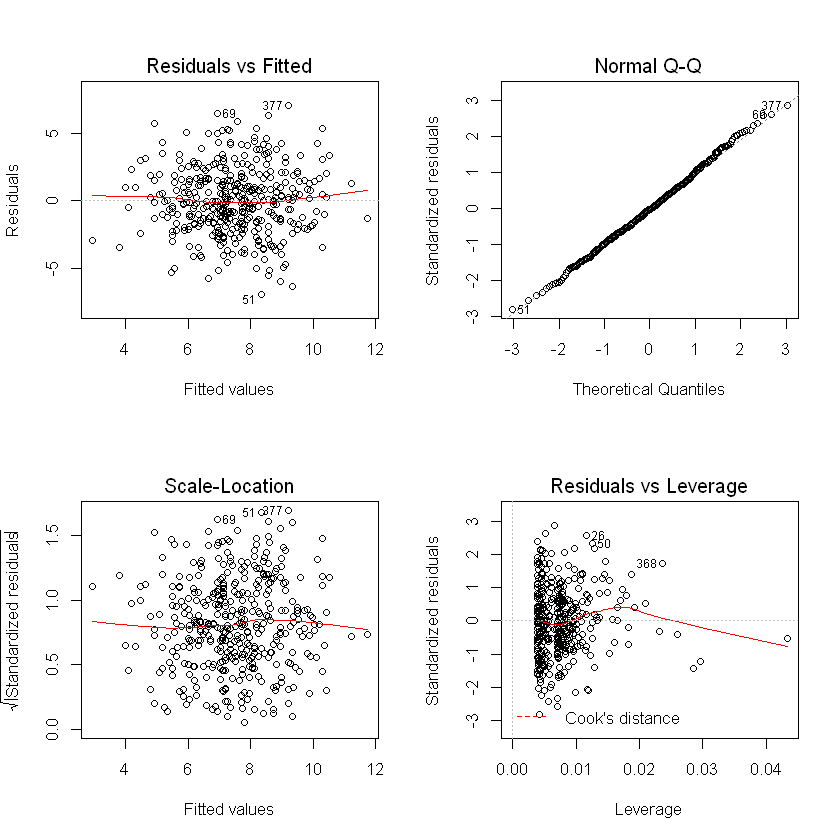

In [17]:
par(mfrow=c(2,2))
plot(lm.smfit)

We can observe some outliers and high leverage observations in the model from (e)

## Question 13

In this exercise we will create some simulated data and will fit simple linear regression models to it. We will use set.seed(1) prior to starting part (a) to ensure consistent results. Steps are below

In [48]:
set.seed(111)

### Step (a)

> Using the `rnorm()` function, create a vector, `x` , containing 100 observations drawn from a `N(0,1)` distribution. This represents a feature, `X`.

In [49]:
x <- rnorm(n = 100, mean = 0, sd = 1)

### Step (b)

> Using the `rnorm()` function, create a vector, `eps`, containing 100 observations drawn from a `N(0,0.25)` distribution i.e. a normal distribution with mean zero and variance 0.25.

In [50]:
eps <- rnorm(n = 100, mean = 0, sd = 0.5)

### Step (c)

> Using x and eps , generate a vector y according to the model $Y=-1+0.5X+\epsilon$. What is the length of the vector $y$ ? What are the values of $\beta_0$ and $\beta_1$ in this linear model?

In [51]:
y = -1 + 0.5 * x + eps
length(y)

[1] 100

The length of vector `y` is 100 and coefficients are $\beta_0=-1$ and $\beta_1=0.5$  

### Step (d)

> Create a scatterplot displaying the relationship between `x` and `y` . Comment on what you observe.

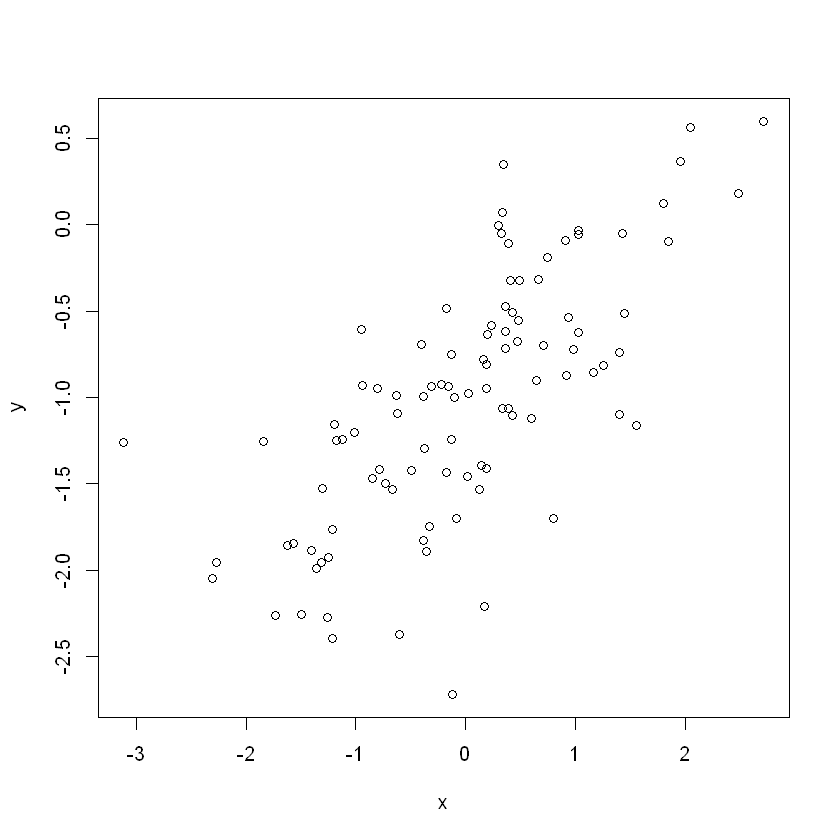

In [52]:
plot(x, y)

From the plot we can observe a somewhat linear relationship.

### Step (e)

> Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How do $\hat{\beta_0}$ and $\hat{\beta_1}$
compare to ${\beta_0}$ and ${\beta_1}$?

In [53]:
lm.fit <- lm(y~x)
summary(lm.fit)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.65602 -0.32895  0.03217  0.31847  1.22099 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.00878    0.05114 -19.726  < 2e-16 ***
x            0.47305    0.04799   9.857 2.48e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5114 on 98 degrees of freedom
Multiple R-squared:  0.4978,	Adjusted R-squared:  0.4927 
F-statistic: 97.16 on 1 and 98 DF,  p-value: 2.476e-16


### Step (f)

> Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` command to create an appropriate legend.

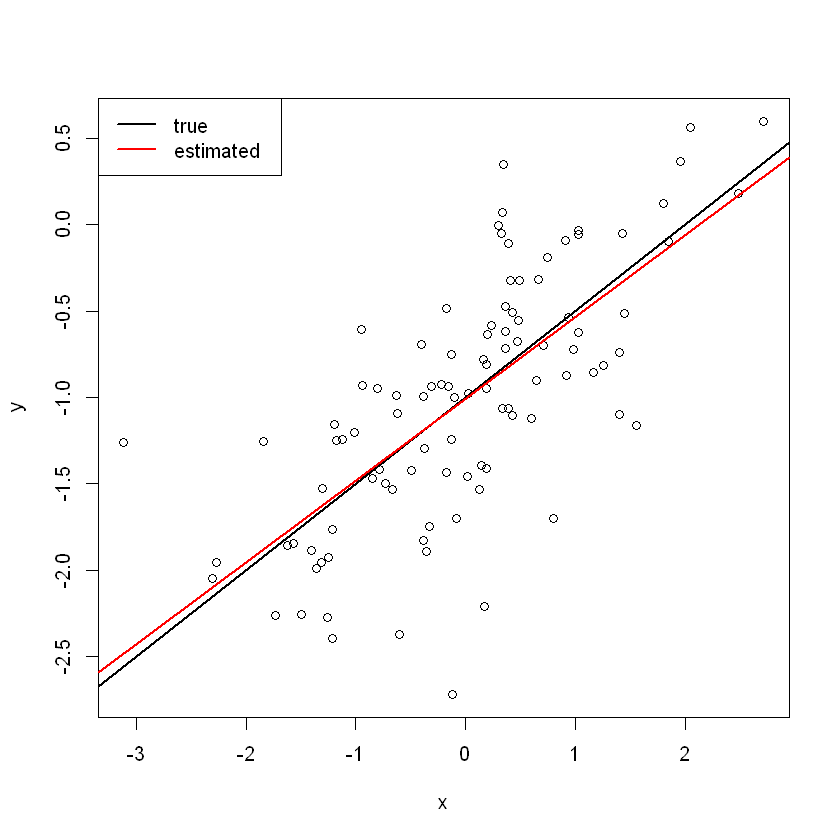

In [60]:
plot(x, y)
abline(-1, 0.5, lwd=2)
abline(lm.fit, col="red", lwd=2)
legend("topleft", c("true", "estimated"), lwd=c(2,2), col=c("black", "red"))

Our model is no better than random guessing, since the R-squared is 0.5.

### Step (g)

> Now fit a polynomial regression model that predicts $y$ using $x$ and $x^2$ . Is there evidence that the quadratic term improves the model fit? Explain your answer.

In [61]:
lm.fit2 <- lm(y~x+I(x^2))
summary(lm.fit2)


Call:
lm(formula = y ~ x + I(x^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.59949 -0.30325 -0.00213  0.34513  1.24385 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.06540    0.06155 -17.308   <2e-16 ***
x            0.47809    0.04770  10.023   <2e-16 ***
I(x^2)       0.04992    0.03076   1.623    0.108    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5071 on 97 degrees of freedom
Multiple R-squared:  0.5111,	Adjusted R-squared:  0.501 
F-statistic: 50.71 on 2 and 97 DF,  p-value: 8.441e-16


#### Step (h)

> Repeat (a)–(f) after modifying the data generation process in such a way that there is less noise in the data. The model (3.39) should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term? in (b). Describe your results.

---

# Additional General Notes

We can demean the quadratic term to decrease the multicollinearity. Poly function in R actually removes the multicollinearity since it uses PCA to almost get rid of multicollinearity.

One sample Kolmogorov - Smirnov Test `ks.test(residuals(ml), "pnorm")`. This is to test the normality of residuals assumption.

Anova (Type II tests), Check also Type III test

Compare model with and without interactions
anova(m2, m3)